In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings; warnings.simplefilter('ignore')
import os
for dirname, _, filenames in os.walk('/users/eunnyoung/work/kaggle/bike-sharing-demand/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/users/eunnyoung/work/kaggle/bike-sharing-demand/data\sampleSubmission.csv
/users/eunnyoung/work/kaggle/bike-sharing-demand/data\test.csv
/users/eunnyoung/work/kaggle/bike-sharing-demand/data\train.csv


## Load Data

In [5]:
train = pd.read_csv('/users/eunnyoung/work/kaggle/bike-sharing-demand/data/train.csv')
test = pd.read_csv('/users/eunnyoung/work/kaggle/bike-sharing-demand/data/test.csv')
submission = pd.read_csv('/users/eunnyoung/work/kaggle/bike-sharing-demand/data/sampleSubmission.csv')

print(train.shape, test.shape, submission.shape)

(10886, 12) (6493, 9) (6493, 2)


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## EDA
### Target Variable

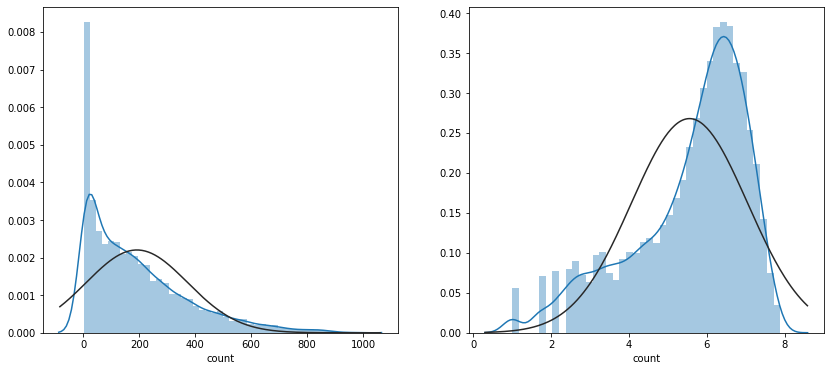

In [8]:
Ytrain = train['count']
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(Ytrain, ax=ax1, fit=norm)
sns.distplot(np.log(Ytrain)+1, ax=ax2, fit=norm)

### Missing Value

In [9]:
feature_names = list(test)
train = train[feature_names]
all_data = pd.concat((train, test))
print(train.shape, test.shape, all_data.shape)

(10886, 9) (6493, 9) (17379, 9)


In [10]:
all_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

### Datetime

In [11]:
all_data['datetime'] = pd.to_datetime(all_data['datetime'])
all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['day'] = all_data['datetime'].dt.day
all_data['hour'] = all_data['datetime'].dt.hour
all_data['dayofweek'] = all_data['datetime'].dt.dayofweek
all_data = all_data.drop(columns = 'datetime')

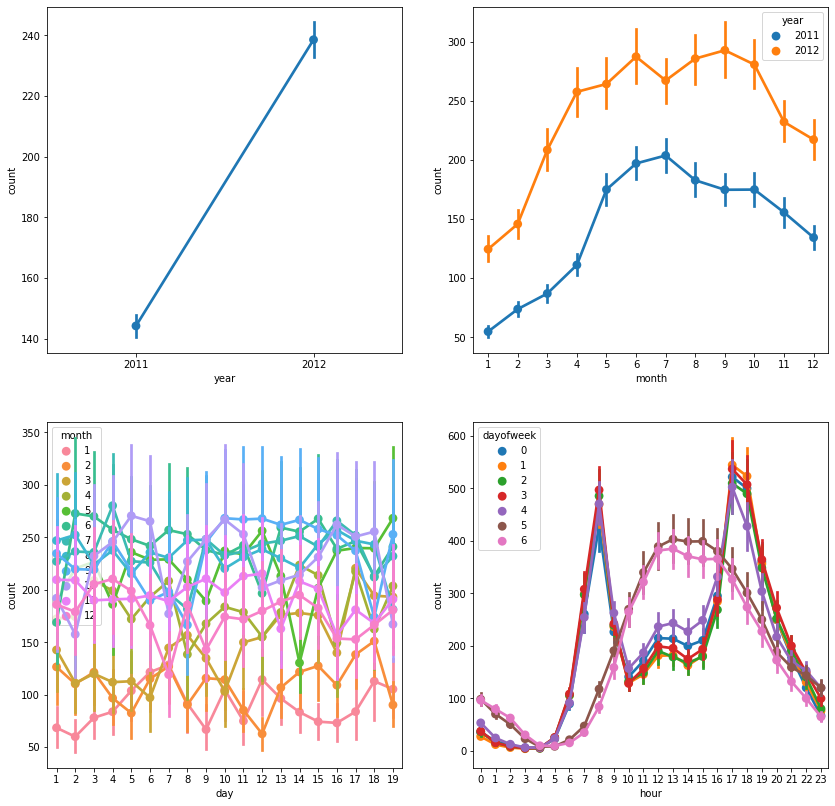

In [12]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,14)
sns.pointplot(data=all_data[:len(train)], x='year', y=Ytrain, ax=ax1)
sns.pointplot(data=all_data[:len(train)], x='month', y=Ytrain, ax=ax2, hue='year')
sns.pointplot(data=all_data[:len(train)], x='day', y=Ytrain, ax=ax3, hue='month')
sns.pointplot(data=all_data[:len(train)], x='hour', y=Ytrain, ax=ax4, hue='dayofweek')

In [13]:
all_data = all_data.drop(columns=['month', 'day'])

In [14]:
all_data['weekend'] = (all_data['dayofweek']==5) | (all_data['dayofweek']==6)

### Season